# CC GENERAL 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv(r'C:\Users\IDEAPAD\Desktop\GOMYCODE\DataSet\CC GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [3]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
data.shape

(8950, 18)

In [5]:
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
data = data.drop('CUST_ID', axis=1)
data = data.dropna(axis=0)

In [8]:
data.shape

(8636, 17)

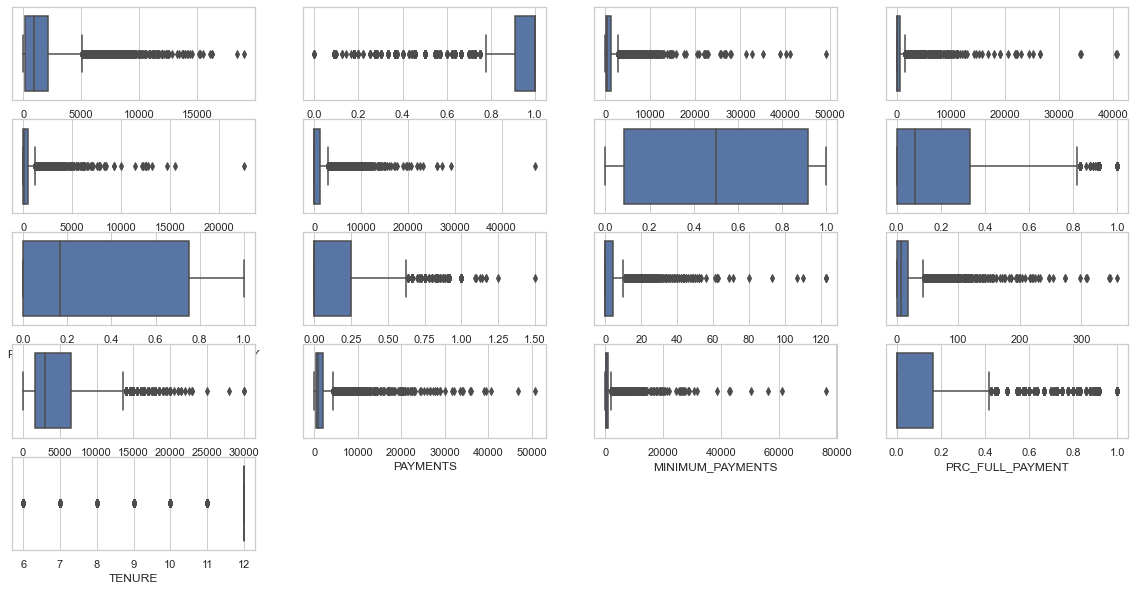

In [9]:
#Visualisation
fig = plt.figure(figsize=(20, 10))
for index, col in enumerate(data.columns, 1):
    sns.set_theme(style="whitegrid")
    ax = fig.add_subplot(5, 4, index)
    sns.boxplot(x=data[col], ax=ax)
plt.show()

<AxesSubplot:>

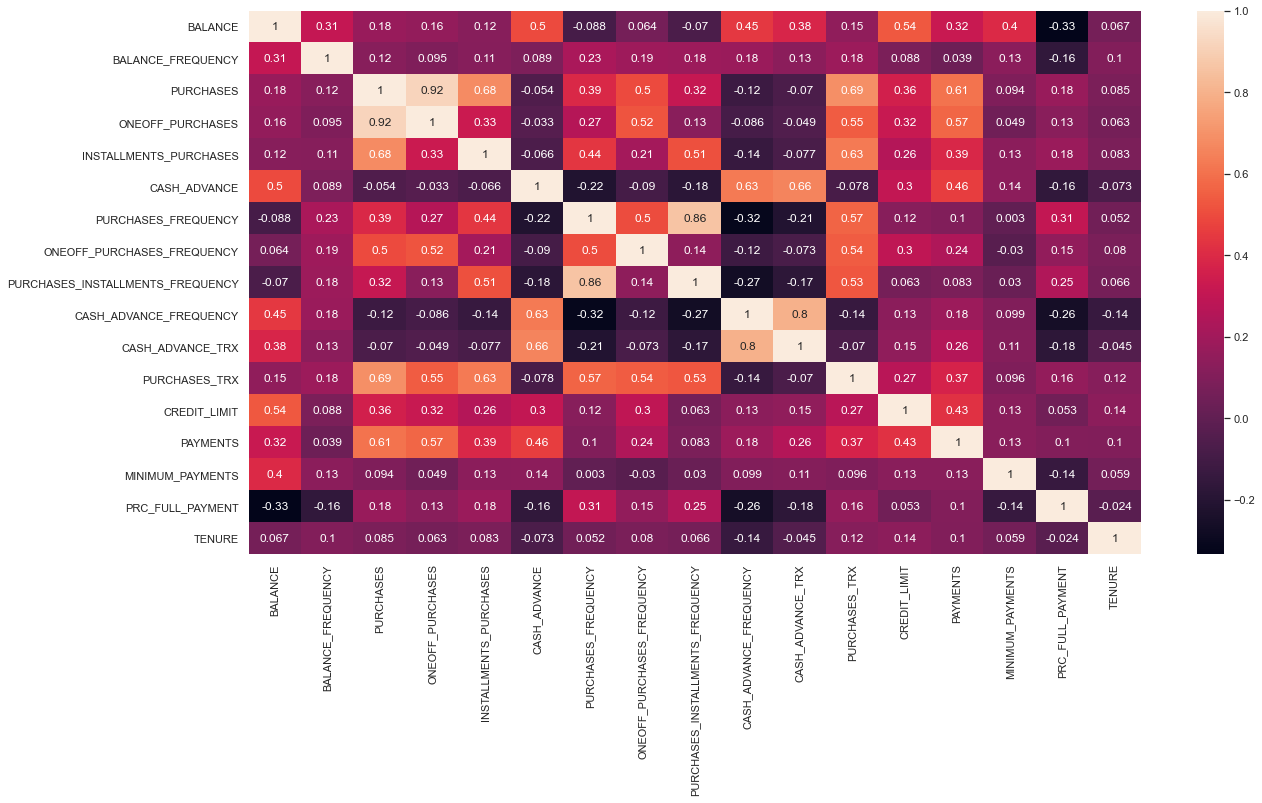

In [10]:
#Matrice de Corrélation
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [11]:
# Standardisation
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
new_data = pd.DataFrame(scale_data, columns=data.columns)
new_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.744625          -0.370047  -0.429184         -0.359160   
1  0.764152           0.067679  -0.473208         -0.359160   
2  0.426602           0.505405  -0.116413          0.099909   
3 -0.373910           0.505405  -0.465825         -0.349660   
4  0.099551           0.505405   0.142062         -0.359160   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.354826     -0.468655            -0.820769   
1               -0.458839      2.568556            -1.236139   
2               -0.458839     -0.468655             1.256077   
3               -0.458839     -0.468655            -1.028455   
4                0.994815     -0.468655             0.425339   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.686280                         -0.717179   
1                   -0.686280                         -0.926522   
2                    2.646651                         -0.926522   
3                   -0.408536                         -0.926522   
4                   -0.686280                          0.538882   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.681953         -0.479437      -0.517623     -0.962575   
1                0.557022          0.099258      -0.597054      0.677204   
2               -0.681953         -0.479437      -0.120467      0.813852   
3               -0.681953         -0.479437      -0.557339     -0.907916   
4               -0.681953         -0.479437      -0.279329     -0.743938   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0 -0.543942         -0.305508         -0.537727  0.355181  
1  0.796852          0.087689          0.212380  0.355181  
2 -0.399503         -0.099906         -0.537727  0.355181  
3 -0.380165         -0.261131         -0.537727  0.355181  
4 -0.132119          0.650363         -0.537727  0.355181

# Hierarchical Clustering

In [13]:
# Recherche des meilleurs paramètres
model_list = []
clusters = range(2, 20) # PLus rapide par pas de 2
linkage_type = ['ward', 'complete', 'single', 'average']
for i in clusters:
    for link_type in linkage_type:
        ag_model = AgglomerativeClustering(n_clusters=i, linkage=link_type, affinity="euclidean")
        preds = ag_model.fit_predict(new_data)
        model_list.append([i, link_type, silhouette_score(new_data, preds)])
ag_df = pd.DataFrame(model_list, columns=['Nombre de Clusters', 'Linkage Type', 'Score'])
ag_df = ag_df.sort_values('Score', ascending=False)
ag_df.head()


Nombre de Clusters Linkage Type     Score
2                    2       single  0.838913
3                    2      average  0.838913
6                    3       single  0.835953
7                    3      average  0.809869
10                   4       single  0.809364

In [14]:
ag_model = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='single')
preds = ag_model.fit_predict(new_data)
print(('Accuracy : {}%').format(round(silhouette_score(new_data, preds) * 100, 2)))

Accuracy : 83.6%


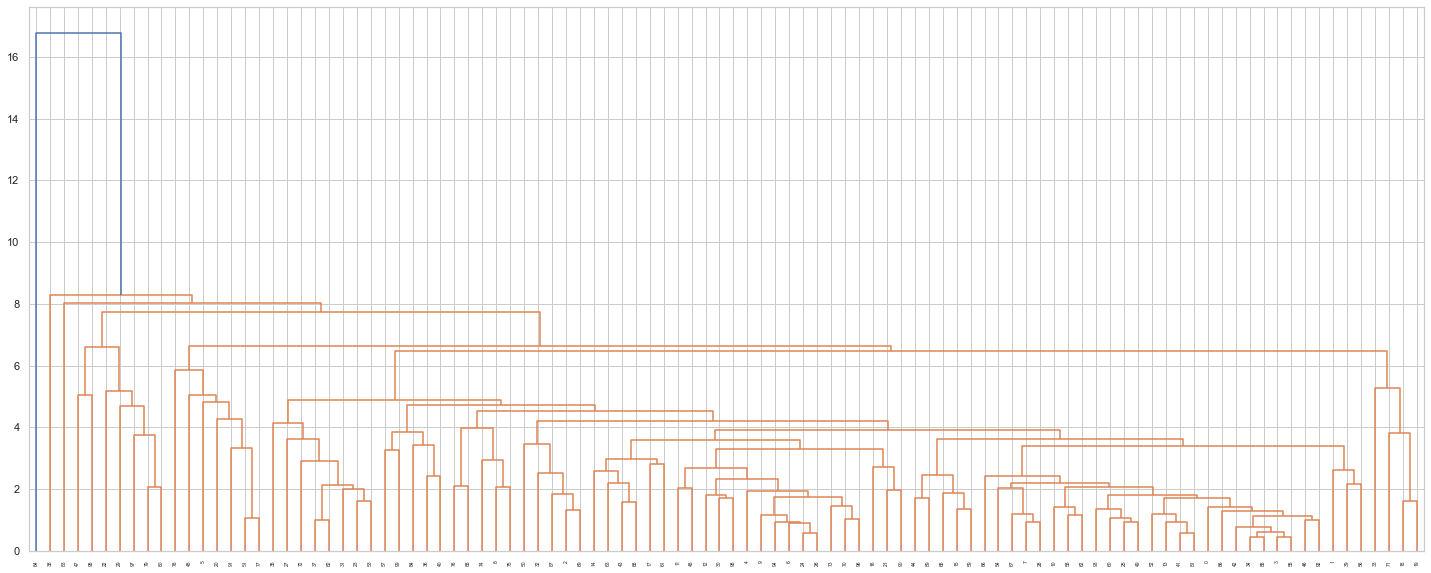

In [15]:
# Dendogram
plt.figure(figsize=(25, 10))
dend = sch.dendrogram(sch.linkage(new_data[:100], method='average')) # Limite à 100 lignes

# K-Means

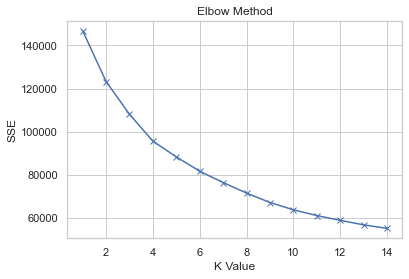

In [16]:
# Recherche de la meilleure valeur de K
sum_squared_distances = []
k_range = range(1, 15)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(new_data)
    sum_squared_distances.append(km.inertia_)

# Plot
plt.plot(k_range, sum_squared_distances, 'bx-')
plt.xlabel("K Value")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

In [17]:
pca = PCA(n_components=2) # 2 pour bidimensionnel
final_data = pca.fit_transform(new_data)
final_data = pd.DataFrame(final_data, columns=['PC1', 'PC2'])
final_data.head()

PC1       PC2
0 -1.696396 -1.122586
1 -1.215677  2.435641
2  0.935858 -0.385200
3 -1.614639 -0.724590
4  0.223704 -0.783609

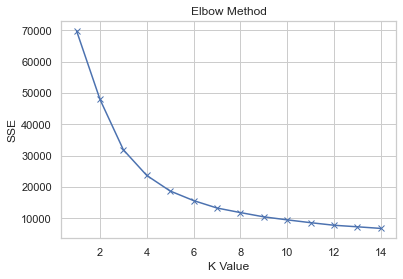

In [18]:
# Après la Réduction de Dimensionnalité
sum_squared_distances = []
k_range = range(1, 15)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(final_data)
    sum_squared_distances.append(km.inertia_)

# Plot ::==> K = 4
plt.plot(k_range, sum_squared_distances, 'bx-')
plt.xlabel("K Value")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

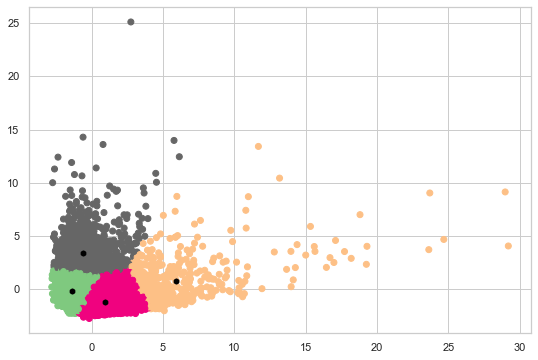

In [32]:
# Visualizing the clustering 
plt.figure(figsize=(9, 6))
km_model = KMeans(n_clusters=4)
preds = km_model.fit_predict(final_data)
plt.scatter(final_data['PC1'], final_data['PC2'], c=preds, cmap =plt.cm.Accent_r) 
centroids = km_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],marker='h', s=10, linewidths=3,color='#000000')
plt.show()